In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import nltk
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')
sns.set()
plt.rcParams['figure.figsize'] = (12,12)

In [67]:
skill_df = pd.read_csv('../data/Skill_Rank.csv',header=[0,1],index_col=0)
course_df = pd.read_excel('../data/CSE_Courses_BD.xlsx',sheet_name = 0)
map_df = pd.read_excel('../data/CSE_Courses_BD.xlsx',sheet_name = 1)

In [68]:
skill_df = skill_df.xs('Percentage',level=1,axis=1)

In [69]:
map_df = map_df.melt(id_vars=['Skills']).dropna().drop(['variable'],axis=1)

In [70]:
map_df = map_df.rename(columns={'value':'Course'})

In [71]:
map_df.index = map_df['Skills']

In [72]:
map_df

,Skills,Course
Skills,,
PHP,PHP,Web Programming
Database,Database,Database/SQL/Oracle
SQL,SQL,Database/SQL/Oracle
JavaScript,JavaScript,Web Programming
SEO,SEO,Web Programming
Android,Android,OOP/C++/Java
CSS,CSS,Web Programming
Oracle,Oracle,Database/SQL/Oracle
HTML,HTML,Web Programming


In [73]:
course_importance = pd.DataFrame(index = course_df['Course Name'], columns = skill_df.columns).fillna(0)
course_importance

,2016,2017,2018,2019,2020,2021
Course Name,,,,,,
Intro to CS,0,0,0,0,0,0
Structured Programming/ C,0,0,0,0,0,0
Discrete Math,0,0,0,0,0,0
OOP/C++/Java,0,0,0,0,0,0
DS & Algorithms,0,0,0,0,0,0
Digital Logic Design,0,0,0,0,0,0
Numeric Methods,0,0,0,0,0,0
Theory of Computation,0,0,0,0,0,0
Database/SQL/Oracle,0,0,0,0,0,0


In [74]:
for skill,course in zip(map_df.index,map_df.Course):
    course_importance.loc[course,:] += skill_df.loc[skill,:]

In [48]:
course

'Web Programming'

In [95]:
melted = course_importance.melt(var_name='Year',value_name='Weight',ignore_index=False)
# melted = melted.reset_index()

In [85]:
?sns.barplot

In [97]:
melted = melted.groupby('Year')['Weight'].nlargest(5)

In [100]:
melted = melted.reset_index()

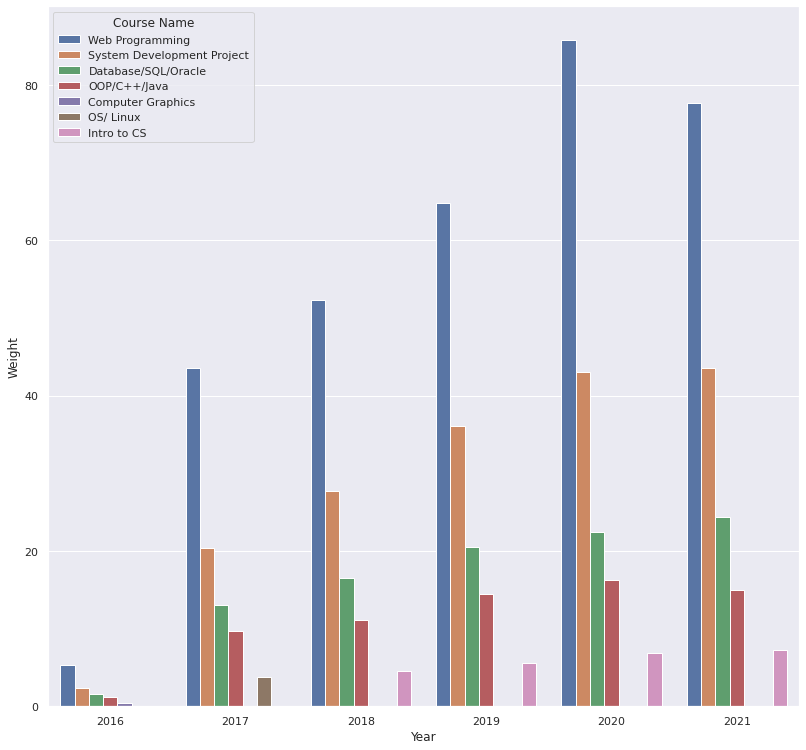

In [185]:
sns.barplot(x='Year',y='Weight',hue='Course Name', data=melted)
plt.savefig('../G1.png')

In [135]:
course_df = course_df.iloc[:,:7]

In [111]:
required_course = set(map_df['Course'])

In [127]:
required_course

{'AI',
 'Computer Graphics',
 'Database/SQL/Oracle',
 'Digital Image Processing',
 'Digital Signal Processing',
 'Intro to CS',
 'Machine Learning/Data Science',
 'OOP/C++/Java',
 'OS/ Linux',
 'Software Engineering',
 'Structured Programming/ C',
 'System Development Project',
 'Web Programming'}

In [133]:
institute_df = pd.DataFrame(index=course_df.columns,columns=skill_df.columns).fillna(0)

In [134]:
institute_df

,2016,2017,2018,2019,2020,2021
BUET,0,0,0,0,0,0
KUET,0,0,0,0,0,0
CUET,0,0,0,0,0,0
RUET,0,0,0,0,0,0
DU,0,0,0,0,0,0
SUST,0,0,0,0,0,0


In [121]:
course_df.index = course_df['Course Name']

In [124]:
course_df = course_df.drop(['Course Name'],axis=1)

In [125]:
course_df[course_df != 0] = 1

In [146]:
course_df.loc[list(required_course),:].sum(axis=0).sort_values(ascending=False)

RUET    12
KUET    11
SUST    11
BUET     9
CUET     8
DU       8
dtype: int64

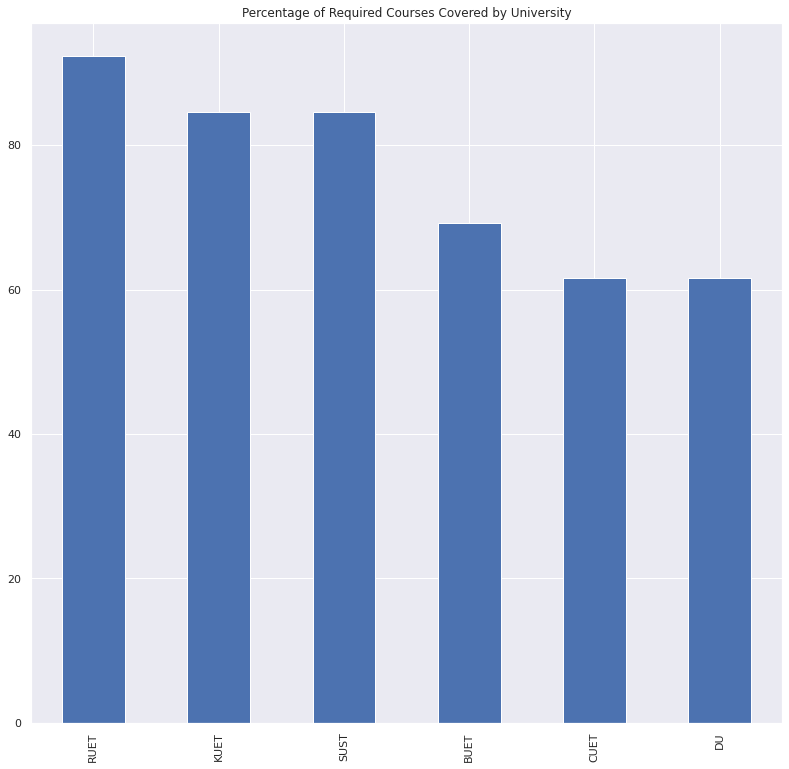

In [186]:
(course_df.loc[list(required_course),:].sum(axis=0)/len(required_course) *100).sort_values(ascending=False).plot.bar()
plt.title('Percentage of Required Courses Covered by University')
plt.savefig('../G2.png')

In [136]:
temp = course_df.loc[list(required_course),:]
# for col in institute_df.columns:
#     institute_df

In [152]:
course_df - temp

,BUET,KUET,CUET,RUET,DU,SUST
Course Name,,,,,,
AI,0.0,0.0,0.0,0.0,0.0,0.0
Compiler,NaN,NaN,NaN,NaN,NaN,NaN
Computer Architecture,NaN,NaN,NaN,NaN,NaN,NaN
Computer Graphics,0.0,0.0,0.0,0.0,0.0,0.0
Computer Networks,NaN,NaN,NaN,NaN,NaN,NaN
Computer Security,NaN,NaN,NaN,NaN,NaN,NaN
Concrete Math/ Probability,NaN,NaN,NaN,NaN,NaN,NaN
DS & Algorithms,NaN,NaN,NaN,NaN,NaN,NaN
Data Communication,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
not_utilized = course_df.copy()

In [159]:
not_utilized[:] = 0

In [164]:
not_utilized.loc[list(required_course),:] = 1

In [170]:
(not_utilized == 0).sum()

BUET    14
KUET    14
CUET    14
RUET    14
DU      14
SUST    14
dtype: int64

In [174]:
not_utilized.sum(axis=0)

BUET    21
KUET    23
CUET    20
RUET    25
DU      18
SUST    21
dtype: int64

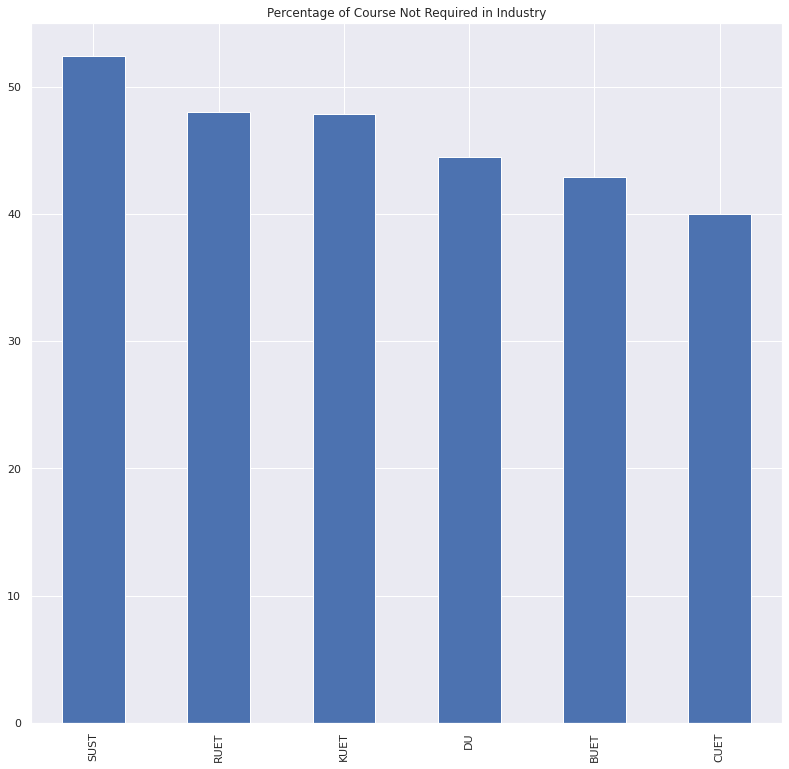

In [182]:
(not_utilized.loc[list(required_course),:].sum(axis=0) / not_utilized.sum(axis=0) * 100).sort_values(ascending=False).plot.bar()
plt.title('Percentage of Course Not Required in Industry')
plt.savefig('../G3.png')